<a href="https://colab.research.google.com/github/Vipercodes18/Capture-and-Display-of-live-text-/blob/main/Capture_and_display_of_live_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


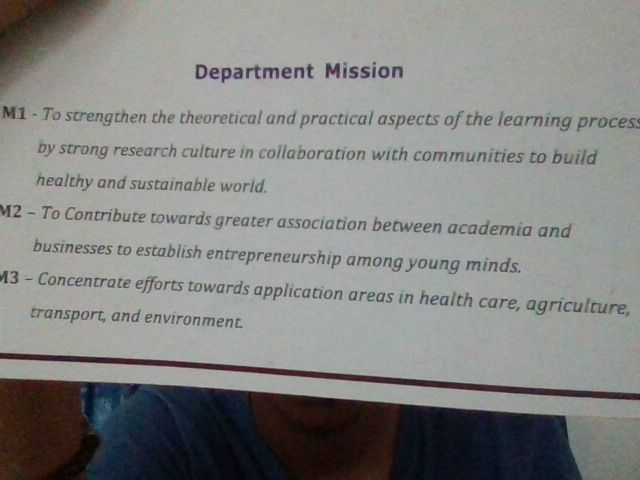

In [2]:
 from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [3]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 27.4 MB/s 
     |████████████████████████████████| 604 kB 49.1 MB/s 
     |████████████████████████████████| 120 kB 71.5 MB/s 
     |████████████████████████████████| 47.6 MB 1.9 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [4]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8,16

reader = easyocr.Reader(['en'])

Image("photo.jpg")
output = reader.readtext("photo.jpg")
output


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[192, 58], [406, 58], [406, 86], [192, 86]],
  'Department Mission',
  0.860815371069944),
 ([[0, 103], [29, 103], [29, 121], [0, 121]], 'M1', 0.33299202548718226),
 ([[38, 102], [640, 102], [640, 134], [38, 134]],
  'To strengthen the theoretical and practical aspects of the learning process',
  0.6422602903157493),
 ([[34, 138], [602, 138], [602, 168], [34, 168]],
  'Dy strong research culture In collaboration with communities tO build',
  0.7540043877187236),
 ([[32, 170], [270, 170], [270, 196], [32, 196]],
  'nealthy and sustainable world',
  0.7902667047603963),
 ([[0, 201], [25, 201], [25, 221], [0, 221]], 'M2', 0.38745105992843065),
 ([[38, 202], [216, 202], [216, 228], [38, 228]],
  'To Contribute towards',
  0.9118188049402874),
 ([[212, 214], [574, 214], [574, 242], [212, 242]],
  'greater association between academia and',
  0.8245596188383781),
 ([[28, 234], [345, 234], [345, 271], [28, 271]],
  'businesses to establish entrepreneurship',
  0.7646948363484746),
 ([[341,

In [5]:
text = [i[-2] for i in output]

In [6]:
%pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from openpyxl import Workbook

workbook = Workbook()
spreadsheet = workbook.active

# for i in range(len(text)):
#   spreadsheet["A"+ str(i+1)] = text[i]

for c in range(0,len(text)):
  spreadsheet[chr(65+c)+'1'] = text[c]

workbook.save(r"Recognised_Text.xlsx")